# 数据读取

In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

# 获取文件路径和标签
def get_files(file_dir):
    # file_dir: 文件夹路径
    # return: 乱序后的图片和标签

    paper = []
    laber_paper = []
    rock = []
    laber_rock = []
    scissors= []
    laber_scissors= []
    # 载入数据路径并写入标签值
    for file in os.listdir(file_dir):
        if file == 'paper':
            for i in os.listdir(file_dir + file):
                paper.append(file_dir + file+'\\'+i)
                laber_paper.append(0)
        elif file == 'rock':
            for i in os.listdir(file_dir + file):
                rock.append(file_dir + file+'\\'+i)
                laber_rock.append(1)  
        else:
            for i in os.listdir(file_dir + file):
                scissors.append(file_dir + file+'\\'+i)
                laber_scissors.append(2)
    print("There are %d paper\nThere are %d rock\nthere are %d scissors" % (len(paper), len(rock) ,len(scissors)))
    # 打乱文件顺序
    image_list = np.hstack((paper, rock,scissors))
    label_list = np.hstack((laber_paper, laber_rock, laber_scissors))
    temp = np.array([image_list, label_list])
    temp = temp.transpose()     # 转置
    np.random.shuffle(temp)

    image_list = list(temp[:, 0])
    label_list = list(temp[:, 1])
    label_list = [int(i) for i in label_list]
    
    #格式转换
    train_data=[]
    for i in range(len(image_list)):
        im=tf.io.read_file(image_list[i])
        im=tf.image.decode_png(im,channels=3)
        train_data.append(im)
    train_data = tf.cast(train_data, tf.uint8)
    train_laber= tf.cast(label_list, tf.uint8) 

    return train_data, train_laber

# 读取数据测试

There are 840 paper
There are 840 rock
there are 840 scissors
image:(2520, 300, 300, 3)
laber:(2520,)
laber:0
There are 117 paper
There are 124 rock
there are 124 scissors
image:(365, 300, 300, 3)
laber:(365,)
laber:1
There are 117 paper
There are 124 rock
there are 124 scissors
predict_image:(365, 300, 300, 3)


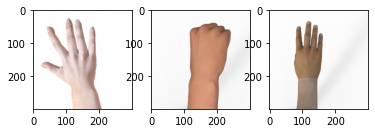

In [2]:
train_dir = ".\\data\\train\\"
train_data, train_laber = get_files(train_dir)
print(f"image:{train_data.shape}")
print(f"laber:{train_laber.shape}")
print(f"laber:{train_laber[0]}")
plt.subplot(1, 3, 1)
plt.imshow(train_data[0])

test_dir = ".\\data\\test\\"
test_data, test_laber = get_files(test_dir)
print(f"image:{test_data.shape}")
print(f"laber:{test_laber.shape}")
print(f"laber:{test_laber[0]}")
plt.subplot(1, 3, 2)
plt.imshow(test_data[0])

predict_dir = ".\\data\\predict\\"
predict_data, predict_laber = get_files(test_dir)
print(f"predict_image:{predict_data.shape}")
plt.subplot(1, 3, 3)
plt.imshow(predict_data[0])

# 图像数据转化

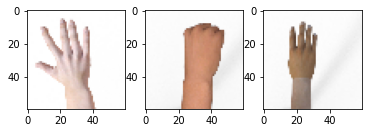

In [3]:
#归一化处理
train_image = tf.image.resize(train_data,[60,60])
test_image = tf.image.resize(test_data,[60,60])
predict_image = tf.image.resize(predict_data,[60,60])
train_image=train_image/255
test_image=test_image/255
predict_image=predict_image/255

plt.subplot(1, 3, 1)
plt.imshow(train_image[0])

plt.subplot(1, 3, 2)
plt.imshow(test_image[0])

plt.subplot(1, 3, 3)
plt.imshow(predict_image[0])

# 搭建模型

In [5]:
# build network
from tensorflow.keras import models, layers

tf.keras.backend.clear_session()

model = models.Sequential()

# conv1
model.add(layers.Conv2D(input_shape=(60, 60, 3), filters=8, 
    kernel_size=(3, 3), activation='relu', padding='same', name='conv1'))
model.add(layers.MaxPool2D(pool_size=(2,2), name='pool1'))

# conv2
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), 
                        activation='relu', name='conv2'))
model.add(layers.MaxPool2D(pool_size=(2,2), name='pool2'))

# # conv3
# model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), 
#                         activation='relu', name='conv4'))
# model.add(layers.MaxPool2D(pool_size=(2,2), name='pool4'))

# flattern
model.add(layers.Flatten(name='flatten'))

# # FC1
#model.add(layers.Dense(256, activation='relu', name='FC1'))
# FC2
#model.add(layers.Dense(64, activation='relu', name='FC2'))
#FC3
model.add(layers.Dense(3, activation='softmax', name="FC3"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 60, 60, 8)         224       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 30, 30, 8)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 26, 26, 16)        3216      
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
FC3 (Dense)                  (None, 3)                 8115      
Total params: 11,555
Trainable params: 11,555
Non-trainable params: 0
____________________________________________________

# 训练

In [6]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy',])
history = model.fit(train_image, train_laber, batch_size=128, epochs=12)

#history.history

Epoch 1/12
20/20 [==============================] - 3s 115ms/step - loss: 0.9942 - accuracy: 0.5631
Epoch 2/12
20/20 [==============================] - 2s 117ms/step - loss: 0.6376 - accuracy: 0.7786
Epoch 3/12
20/20 [==============================] - 2s 115ms/step - loss: 0.3613 - accuracy: 0.9143
Epoch 4/12
20/20 [==============================] - 2s 115ms/step - loss: 0.2141 - accuracy: 0.9575
Epoch 5/12
20/20 [==============================] - 2s 115ms/step - loss: 0.1256 - accuracy: 0.9821
Epoch 6/12
20/20 [==============================] - 2s 114ms/step - loss: 0.0860 - accuracy: 0.9849
Epoch 7/12
20/20 [==============================] - 2s 114ms/step - loss: 0.0583 - accuracy: 0.9909
Epoch 8/12
20/20 [==============================] - 2s 114ms/step - loss: 0.0417 - accuracy: 0.9917
Epoch 9/12
20/20 [==============================] - 2s 116ms/step - loss: 0.0401 - accuracy: 0.9944
Epoch 10/12
20/20 [==============================] - 2s 120ms/step - loss: 0.0322 - accuracy: 0.9944

# 评价

Evaluate on test data
31/31 [==============================] - 0s 4ms/step - loss: 0.3572 - accuracy: 0.8849
test loss, test acc: [0.3571608364582062, 0.8849315047264099]


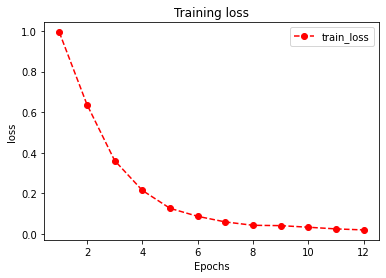

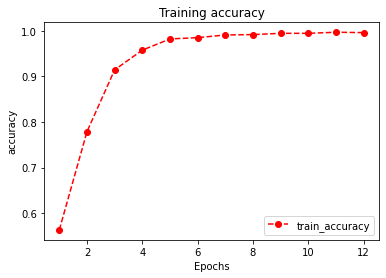

In [7]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_image, test_laber, batch_size=12)
print("test loss, test acc:", results)

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    epochs =range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'ro--')
    # 相关属性
    plt.title('Training ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend(['train_'+metric])
    plt.show()
    
plot_metric(history, 'loss')
plot_metric(history, 'accuracy')

# 模型预测

[[9.9998319e-01 4.2257469e-09 1.6764789e-05]]


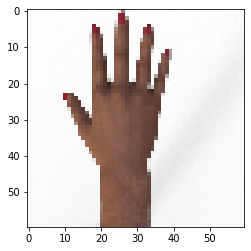

predict : paper
[[0.9571699  0.0025432  0.04028693]]


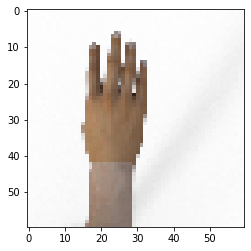

predict : paper
[[0.099056   0.00807311 0.8928709 ]]


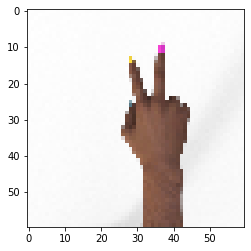

predict : scossos
[[0.00222009 0.9938427  0.00393713]]


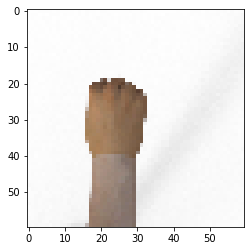

predict : rock
[[0.7174552  0.27819237 0.00435247]]


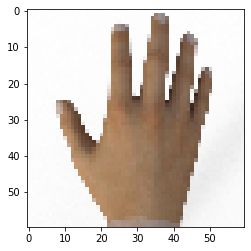

predict : paper


In [8]:
# 找五张图片做测试
string_pre=['paper','rock','scossos']
for i in predict_image[100:105]:
    y=model.predict(tf.expand_dims(i,axis=0))
    print(y)
    p = np.argmax(y)
    plt.imshow(i)
    plt.show()
    print(f"predict : {string_pre[p]}")


# 模型保存

In [9]:
from pathlib import Path
# 在当前路径下创建 model 文件夹，存放模型
# exist_ok 如果文件夹已经存在，不会报错，如果没有，则会创建
model_path = Path("model")
model_path.mkdir(exist_ok=True) 
keras_file = model_path/'test.h5'
print(keras_file)
model.save(keras_file, save_format="h5")

model\test.h5


# keras 模型转 tflite

In [10]:
# keras 模型转 tflite，后者模型会更小一点，算子支持更多

model = tf.keras.models.load_model(keras_file)
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()
tflite_file = Path("./model/test.tflite")
#tflite_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\haiijun\AppData\Local\Temp\tmpmpd4zv2i\assets


# 模型量化

In [11]:
import cv2
import time
import random
from tqdm import tqdm
from pathlib import Path

def create_test_data(CATEGORIES, DATADIR, img_shape):
    test_x = []  # 测试集的数据和标签
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path, img))  # convert to array
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, img_shape)  # resize to normalize data size
                new_array = new_array.astype(np.float32) / 255.
                new_array = np.expand_dims(new_array, axis=0)
                test_x.append(new_array)
            except Exception as e:  # in the interest in keeping the output clean...
                pass

    return test_x

def keras2tflite(keras_file, tflite_file, test_images):
    def representative_data_gen():
        for input_value in test_images:
            yield [input_value]
            
    # 恢复 keras 模型，并预测
    model = tf.keras.models.load_model(keras_file)

    # 动态量化 dynamic range quantization
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    converter.representative_dataset = representative_data_gen
    # Ensure that if any ops can't be quantized, the converter throws an error
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
    # Set the input and output tensors to uint8 (APIs added in r2.3)
    converter.inference_input_type = tf.uint8
    converter.inference_output_type = tf.uint8
    
    tflite_model = converter.convert()
    
    tflite_file.write_bytes(tflite_model)
    print("convert model to tflite done...")


DATADIR = './data/test/'
CATEGORIES = ['paper', 'rock','scissors']
img_shape = (60, 60)
test_x = create_test_data(CATEGORIES, DATADIR, img_shape)

keras_file = './Model/test.h5'
tflite_file = Path("./Model/test.tflite")
keras2tflite(keras_file, tflite_file, test_x)


100%|███████████████████████████████████████████████████████████████████████████████| 124/124 [00:00<00:00, 447.20it/s]


INFO:tensorflow:Assets written to: C:\Users\haiijun\AppData\Local\Temp\tmp0tr6a0to\assets


INFO:tensorflow:Assets written to: C:\Users\haiijun\AppData\Local\Temp\tmp0tr6a0to\assets


convert model to tflite done...


# 加载模型+测试

In [12]:
import cv2
import time
import random
from tqdm import tqdm
from pathlib import Path
keras_file = './Model/test.h5'
tflite_file = Path("./Model/test.tflite")
CATEGORIES = ['paper', 'rock','scissors']
interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

height = input_details['shape'][1]
width = input_details['shape'][2]

# 单个测试样本数据
image = cv2.imread('./data/predict/4.jpg')
image = cv2.resize(image, (width, height))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.expand_dims(image, axis=0)
image.flatten()
interpreter.set_tensor(input_details['index'], image)

start_time = time.time()
interpreter.invoke()
stop_time = time.time()

input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

output_data = interpreter.get_tensor(output_details['index'])
print(output_data)
print(f"prediction: {CATEGORIES[np.argmax(output_data)]}")
print('time: {:.3f}ms'.format((stop_time - start_time) * 1000))
print("model size: {:.2f} MB".format(os.path.getsize(tflite_file)/1024/1024))

input:  <class 'numpy.uint8'>
output:  <class 'numpy.uint8'>
[[  0 255   0]]
prediction: rock
time: 30.918ms
model size: 0.01 MB
